In [156]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
# Building Supervised Predictive Models

# Testing data (training data) and evaluating its performance/generalizability on hold-out or testing data
train = pd.read_csv("traint.csv")
train.shape
train.head(7)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [158]:
test=pd.read_csv("testt.csv")
test.shape

(418, 11)

In [159]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [160]:
# when we don't have a separate hold-out test dataset we take our dataset and split it into training data(80%) and 
# testing data(20%), then we fit the model on 80% of the data and test its performance on the 20% data set.

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Load the Diabetes Housing dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the column names
diabetes = datasets.load_diabetes() # call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y
df.head(6)


,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346


In [161]:
df.shape

(442, 10)

In [162]:
# create training and testing variables
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(353, 10) (353L,)
(89, 10) (89L,)


In [163]:
x_train.head(6)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
343,-0.020045,-0.044642,0.018584,0.090730,0.003935,0.008707,0.037595,-0.039493,-0.057800,0.007207
201,-0.034575,0.050680,-0.055785,-0.015999,-0.009825,-0.007890,0.037595,-0.039493,-0.052959,0.027917
228,-0.052738,-0.044642,-0.012673,-0.060757,-0.000193,0.008081,0.011824,-0.002592,-0.027129,-0.050783
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020289,-0.025930
352,0.012648,0.050680,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020289,-0.038357
181,0.048974,-0.044642,-0.042852,-0.053871,0.045213,0.050042,0.033914,-0.002592,-0.025952,-0.063209


In [164]:
x_test.head(6)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349
23,0.045341,0.050680,0.060618,0.031053,0.028702,-0.047347,-0.054446,0.071210,0.133599,0.135612
393,-0.074533,-0.044642,-0.046085,-0.043542,-0.029088,-0.023234,0.015505,-0.039493,-0.039810,-0.021788
348,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
171,-0.020045,-0.044642,-0.046085,-0.098628,-0.075870,-0.059873,-0.017629,-0.039493,-0.051401,-0.046641
91,0.045341,-0.044642,0.051996,-0.053871,0.063101,0.064760,-0.010266,0.034309,0.037232,0.019633


In [165]:
# Issues with data splitting: Splitting data can lead to unstable results when we have a small data set.
# Cross-Validation: --> divide your data into folds (each fold is a container that holds an even distribution of the cases),
# usually a 5 or 10( 5 fold CV and 10 fold CV respectively)
# Hold one fold as a test set and use the others as training sets
# train and record the test set result
# perform steps 2 and 3 again, using each fold in turn as a test set.
# calculate the average and the standard deviation of all the folds' test results.

from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

iris_data=datasets.load_iris()

In [166]:
print(iris_data)

{'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n           

In [167]:
data_input = iris_data.data
data_output = iris_data.target

In [168]:
kf = KFold(10,True,5) # n_splits=5, shuffle=True

In [169]:
for train_set, test_set in kf.split(data_input, data_output):
    print(train_set,test_set)

(array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  58,  59,  60,  61,  62,  63,  64,  65,  67,  68,  69,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  83,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 103, 104, 105, 106, 108, 110, 111, 112, 113, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149], dtype=int64), array([  1,  25,  26,  42,  57,  66,  70,  82,  84, 102, 107, 109, 114,
       133, 134], dtype=int64))
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  22,  24,  25

In [170]:
# Evaluating Classification and Regression models:
# Types of Supervised Learning:
# Regression -> in this type of learning, the values continuous numerical variables are predicted, this includes predicting
# the values of quantitative attributes like house prices, weight
# Classification -> in this type of learning, the values of categorical variables or factors is predicted. Categorical
# variables can be numerical whole numbers (representing categories 1 to n) or defined in terms of their qualitative terms like
# species names. These can be either binary classifications (where response variables are 0 or 1 - dead or alive) or
# multiclass classifications (2 or more categories). Former lends itself to logistic regression.

# RANDOM FOREST - regression

data = datasets.load_boston()
x = pd.DataFrame(data.data, columns = data.feature_names)
x.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21


In [171]:
# Put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(data.target, columns = ["MEDV"])
y.head(5)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [172]:
# split the data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.2, random_state=25) #20% hold out for testing

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [174]:
print(regr.feature_importances_)


[0.         0.         0.         0.         0.00729892 0.70021159
 0.         0.         0.         0.         0.         0.
 0.29248949]


In [175]:
importances = regr.feature_importances_ #RF based predictor variable importance

In [176]:
indices = np.argsort(importances)[::-1]
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 5 (0.700212)
2. feature 12 (0.292489)
3. feature 4 (0.007299)
4. feature 11 (0.000000)
5. feature 10 (0.000000)
6. feature 9 (0.000000)
7. feature 8 (0.000000)
8. feature 7 (0.000000)
9. feature 6 (0.000000)
10. feature 3 (0.000000)
11. feature 2 (0.000000)
12. feature 1 (0.000000)
13. feature 0 (0.000000)


In [177]:
x.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [178]:
y_pred = regr.predict(x_test)

In [179]:
y_pred

array([15.36462224, 15.36462224, 23.01660873, 14.54563994, 16.25055599,
       23.01660873, 24.08692209, 14.54563994, 14.54563994, 41.65039063,
       14.54563994, 14.54563994, 17.13054181, 23.01660873, 25.0774782 ,
       23.01660873, 23.01660873, 14.54563994, 14.54563994, 23.01660873,
       23.01660873, 14.54563994, 23.01660873, 31.98945675, 23.01660873,
       23.01660873, 45.0534172 , 23.01660873, 23.01660873, 23.01660873,
       23.01660873, 24.08692209, 23.01660873, 23.01660873, 14.54563994,
       23.01660873, 23.01660873, 23.01660873, 30.06063136, 23.01660873,
       23.01660873, 23.01660873, 14.54563994, 16.25055599, 14.54563994,
       23.01660873, 14.54563994, 23.01660873, 31.98945675, 14.54563994,
       14.54563994, 15.36462224, 25.9094525 , 23.01660873, 23.01660873,
       14.54563994, 31.98945675, 24.08692209, 14.54563994, 24.08692209,
       14.54563994, 22.1699973 , 23.01660873, 23.01660873, 24.08692209,
       14.54563994, 23.01660873, 24.08692209, 23.01660873, 23.01

In [180]:
from sklearn.metrics import mean_squared_error

In [181]:
mean_squared_error(y_test, y_pred)

33.03367144178237

In [182]:
from sklearn.metrics import r2_score

In [183]:
r2_score(y_test, y_pred)

0.5156731310597823

In [184]:
# define the data/predictors as the pre-set feature names
x = pd.DataFrame(data.data, columns = data.feature_names)

In [185]:
x.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [186]:
x1=x[["RM", "LSTAT"]] # Let's work with 2 predictor variables

In [187]:
# Put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(data.target, columns=["MEDV"])

In [188]:
#split the data
x1_train,x1_test,y_train,y_test = train_test_split(x1,y, test_size=.2, random_state = 25) #20% hold out for testing

In [189]:
regr.fit(x1_train, y_train)

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [190]:
y1_pred = regr.predict(x1_test)

In [191]:
mean_squared_error(y_test, y1_pred) #MSE

33.28128491726266

In [192]:
print(regr.feature_importances_)

[0.70093174 0.29906826]


In [193]:
# Common algorithms in supervised learning are:
#    - Lazy learning Algorithms (KNN supervised learning) --- KNN (K-NEAREST NEIGHBOURS)
#    - support vector machines(or SVM is used for classifications and regressions)
#    - tree based/ensemble classifier (random forest and gradient boosting algorithm)
#    - ensemble classifiers - voting classifiers
#    - logistic regression with binary reponse variables (0 and 1)

# Logistic regression 
# classification with binary response variable

train=pd.read_csv("traint.csv")
test=pd.read_csv("testt.csv")

In [194]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [195]:
df = train[['Survived', 'Pclass','Sex','Age','Fare']]
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [196]:
# change male to 1 and female to 0
df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=="male" else 0)

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [197]:
df.head(5) # Sex as categorical variable

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [198]:
# handle missing values of age
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [200]:
x_train = df.drop("Survived", axis=1)
y_train = df["Survived"]

In [201]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # define the logistic regression model
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [202]:
# Peek at test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [203]:
x_test=test[['Pclass', 'Sex', 'Age', 'Fare']]
x_test["Sex"] = x_test["Sex"].apply(lambda sex:1 if sex=="male" else 0)

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [204]:
x_test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [205]:
x_test["Age"] = x_test["Age"].fillna(x_test["Age"].median())

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [206]:
x_test = x_test.dropna()

In [207]:
x_test.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [208]:
x_test.head(5)

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875


In [209]:
y_pred = logreg.predict(x_test)

In [210]:
acc_log = round(logreg.score(x_train, y_train) * 100, 2) # accuracy of the model
acc_log

79.15

In [211]:
x_train.head(3)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250


In [212]:
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [213]:
g=x_train[['Sex']]

In [214]:
logreg=LogisticRegression() # define the logistic regression model
logreg.fit(g, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
gT=x_test[['Sex']]

In [216]:
gT.head(4)

,Sex
0,1
1,0
2,1
3,1


In [217]:
preds=logreg.predict_proba(gT)

In [218]:
preds=pd.DataFrame(preds)
preds.columns=["Death_prob", "Survival_prob"]

In [219]:
# Generate table of predictions vs Sex
pd.crosstab(train["Sex"], preds.ix[:, "Survival_prob"]) # predict the probability of survival according to gender

E:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Survival_prob,0.192795022876,0.731106837519
Sex,,
female,100,59
male,165,93


In [220]:
# Random Forest for Classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [221]:
glass = pd.read_csv("glassClass.csv")

In [222]:
glass.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1


In [223]:
x=glass.drop("Type", axis=1)
y= glass["Type"]

In [224]:
# training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=25) #20% hold out for testing

In [225]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [226]:
random_forest.score(x_train,y_train) #100% accuracy when we implement the RF model on the same data set.

1.0

In [227]:
y_pred = random_forest.predict(x_test) #predict the classification of glass based on test predictions

In [228]:
y_pred #predicted values of classifications

array([1, 3, 2, 1, 5, 2, 2, 1, 2, 7, 2, 6, 5, 1, 2, 6, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 7, 2, 1, 3, 7, 1, 7, 1, 7, 2, 1, 1, 2, 2, 7],
      dtype=int64)

In [229]:
random_forest.predict_proba(x_test)[0:10] # testing how confident is the classifier about each glass type

array([[0.4 , 0.34, 0.23, 0.01, 0.  , 0.02],
       [0.37, 0.21, 0.42, 0.  , 0.  , 0.  ],
       [0.24, 0.51, 0.23, 0.02, 0.  , 0.  ],
       [0.93, 0.01, 0.06, 0.  , 0.  , 0.  ],
       [0.01, 0.13, 0.01, 0.81, 0.04, 0.  ],
       [0.05, 0.37, 0.  , 0.37, 0.2 , 0.01],
       [0.07, 0.89, 0.04, 0.  , 0.  , 0.  ],
       [0.46, 0.29, 0.25, 0.  , 0.  , 0.  ],
       [0.22, 0.41, 0.06, 0.05, 0.24, 0.02],
       [0.01, 0.  , 0.  , 0.  , 0.08, 0.91]])

In [230]:
# performance on test set
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[10,  2,  0,  0,  0,  0],
       [ 0, 17,  1,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) # compare with the actual y values, y_test (hold outs) with predicted y

0.8604651162790697

In [232]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred) # scores above .8 are generally considered good agreement.


0.7987519500780031

In [233]:
from sklearn.metrics import classification_report

In [234]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.81      0.89      0.85        19
           3       0.50      1.00      0.67         1
           5       0.50      0.50      0.50         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         6

   micro avg       0.86      0.86      0.86        43
   macro avg       0.80      0.82      0.79        43
weighted avg       0.88      0.86      0.86        43



In [235]:
# out of all the examples the classifier labeled, what fractions were correct are shown next
# feature selection

from sklearn.feature_selection import RFE # Recursive Feature Elimination (RFE) method is a feature selection approach.
#it works by recursively removing attributes and building a model on those attributes that remain.
# it uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting
# the target attribute.
# create the RFE model and select 3 attributes.
rfe = RFE(random_forest, 5)
fit = rfe.fit(x,y)
#summarize the selection of the attributes
print("Num of Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num of Features: 5
Selected Features: [ True  True  True  True False False  True False False]
Feature Ranking: [1 1 1 1 3 2 1 4 5]


In [236]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                             random_state=0)
forest.fit(x,y)
importances = forest.feature_importances_

In [237]:
indices = np.argsort(importances)[::-1]

In [238]:
print("Feature ranking: ")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking: 
1. feature 2 (0.176743)
2. feature 0 (0.138102)
3. feature 3 (0.135153)
4. feature 6 (0.132065)
5. feature 5 (0.100274)
6. feature 1 (0.094001)
7. feature 4 (0.088294)
8. feature 7 (0.081736)
9. feature 8 (0.053633)


In [239]:
x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [240]:
# Linear SVM Classification
from sklearn import svm
from sklearn.svm import LinearSVC #for Linear classification with SVM
# import same data to play with
iris = datasets.load_iris()

In [241]:
x = iris.data[:, :2] # we only take the first two features.
y = iris.target
h=.02 # step size in the mesh
c = 1.0 # SVM regularization parameter

In [242]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.25, random_state = 25) # 25% hold out for testing


In [243]:
svc = svm.SVC(kernel='linear', C=c) # initialize an SVM model with a linear kernel

In [244]:
# fit the linear svm on our training data
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [245]:
y_pred = svc.predict(x_test)

In [246]:
# test accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 10,  6],
       [ 0,  1, 10]], dtype=int64)

In [247]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8157894736842105


In [248]:
# Non-Linear support vector machine (SVM) classification
from sklearn.svm import SVC # for non-linear
iris = datasets.load_iris()

In [249]:
x = iris.data[:,:2]
y=iris.target
h = .02 # step size in the mesh
c = 1

In [250]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=25) #25% are test data sets


In [251]:
svc1 = svm.SVC(kernel='rbf', gamma=0.7,C=c) # initialize an SVM model with an rbf kernel
# fit the svm with the rbf kernel on our training data

In [252]:
svc1.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [253]:
y1_pred = svc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y1_pred))

0.8157894736842105


In [254]:
# use a polynomial kernel
svc2 = svm.SVC(kernel='poly', degree = 3, C=c) # initialize an SVM model with a polynomial kernel
svc2.fit(x_train, y_train)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [255]:
y2_pred = svc.predict(x_test)
print(accuracy_score(y_test,y2_pred))

0.8157894736842105


In [256]:
# Support Vector Regression
from sklearn.svm import SVR # for support vector regression
data = datasets.load_boston() # Loads the boston dataset from datasets library
#define the data/predictors as the pre-set feature names
x = pd.DataFrame(data.data, columns = data.feature_names)
# put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(data.target, columns=["MEDV"])

In [257]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=25) #25% hold out for testing


In [258]:
model = SVR() # variable model stores scikit's SVR model

#y_pred = model.predict(x_test) # predicted y values on the 25% hold out predictor data
#y_pred

In [259]:

model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [260]:
y_pred = model.predict(x_test) # predicted y values on the 25% hold out predictor data

In [261]:
y_pred

array([21.2247143 , 21.53015594, 21.23609856, 20.46181346, 19.98519507,
       21.22584869, 21.58111038, 21.22584429, 21.22584427, 21.23078138,
       21.1976435 , 21.19426397, 21.22584429, 20.82086461, 21.25030372,
       21.27765957, 21.22584429, 21.22584429, 21.22584429, 21.42912078,
       21.2258443 , 21.22583919, 21.23142995, 21.42923986, 21.22584802,
       21.25801963, 21.22584429, 21.22645923, 21.22580925, 21.24665565,
       21.22584944, 21.26818103, 21.20802446, 21.23254161, 21.21902195,
       21.22584429, 21.22584429, 21.22584429, 21.20632585, 20.42072708,
       21.24849237, 21.27971505, 21.20771224, 21.22074716, 21.2256869 ,
       21.22057199, 21.25481199, 21.22286708, 21.22584582, 21.22584429,
       21.22589607, 21.14913965, 21.22613202, 20.78239574, 21.22584429,
       21.22518301, 21.50799907, 21.22586759, 21.02751613, 21.24646421,
       21.19151179, 21.18234595, 21.22584429, 20.61842852, 21.22584437,
       18.35953661, 21.17256038, 21.54040081, 21.22584812, 21.22

In [262]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) #MSE


71.11497818526345

In [263]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.0047245066865985175

In [264]:
# kNN for classification
from sklearn.neighbors import KNeighborsClassifier

In [265]:
glass = pd.read_csv("glassClass.csv")
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [266]:
x=glass.drop("Type", axis=1) # predictors
y=glass["Type"] # response

In [267]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=25) # 20% hold out for testing

In [268]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [269]:
# fitting the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [270]:
#predict the response
y_pred = knn.predict(x_test)

In [271]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 9,  2,  1,  0,  0,  0],
       [ 5, 13,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [272]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7209302325581395


In [273]:
#parameter tuning with cross-validation
from sklearn.model_selection import cross_val_score


#creating list of K/neighbours for KNN
myList = list(range(1,50))

#empty list that will hold cv scores
cv_scores = []

#perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
    

The optimal number of neighbors is 1


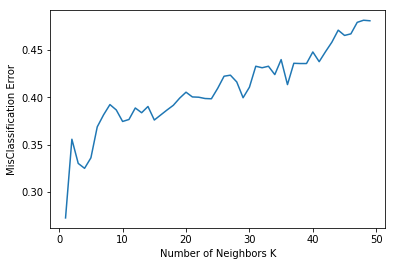

In [274]:
#changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('MisClassification Error')
plt.show()

In [275]:
# kNN Regression

data = datasets.load_boston() ## Loads Boston dataset from dataset Library
# define the data/predictors as the pre-set feature names
x = pd.DataFrame(data.data, columns = data.feature_names)
# put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(data.target, columns=['MEDV'])


In [276]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=25) # 25% hold out for testing

In [277]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3)
# fitting the model
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [278]:
# predict the response
y_pred = knn.predict(x_test)

In [279]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred) #MSE

51.91074365704286

In [280]:
from sklearn.metrics import r2_score

In [281]:
r2_score(y_test,y_pred)

0.27349354074279875

In [282]:
# Gradient boosting Classification

from sklearn.ensemble import GradientBoostingClassifier

glass=pd.read_csv("glassClass.csv")
glass.head(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1


In [283]:
x=glass.drop("Type", axis=1) # predictors
y=glass["Type"] #response


In [284]:
# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state = 25) #25% hold out for testing
gbc1 = GradientBoostingClassifier(n_estimators=200, max_depth=3) # number of sequential trees to be modeled

In [285]:
gbc1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [286]:
# predict class labels
y_pred = gbc1.predict(x_test)

In [287]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[12,  2,  2,  0,  0,  0],
       [ 1, 20,  1,  1,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 1,  1,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  7]], dtype=int64)

In [288]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7962962962962963


In [289]:
print gbc1.feature_importances_ #% importance of the different features

[0.12962078 0.05716957 0.11944156 0.19867518 0.04682164 0.06505503
 0.15471094 0.16370612 0.06479918]


In [290]:
print(gbc1.score(x_train,y_train))
print(gbc1.score(x_test,y_test))

1.0
0.7962962962962963


In [291]:
#change parameters
gbc2 = GradientBoostingClassifier(n_estimators=300, max_depth=5)

In [292]:
gbc2.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [293]:
# predict class labels
y_pred = gbc2.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7592592592592593


In [297]:
#Gradient Boosting Regression (GBR)

from sklearn.ensemble import GradientBoostingRegressor

data = datasets.load_boston()
# define the data/predictors as the pre-set feature names
x = pd.DataFrame(data.data, columns = data.feature_names)

# put the target (housing value -- MEDV) in another DataFrame
y = pd.DataFrame(data.target,columns=["MEDV"])


In [298]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25, random_state=25) #25% hold out for testing.

In [299]:
gbr1 = GradientBoostingRegressor(n_estimators=200, max_depth=3) # number of sequential trees to be modeled
gbr1.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [300]:
#predict
y_pred = gbr1.predict(x_test)

In [301]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) #MSE


7.814463479340607

In [302]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8906342349691959

In [303]:
print(gbr1.feature_importances_) #% importance of the different features

[2.14293626e-02 6.40916414e-04 1.91174861e-03 1.40736151e-04
 4.11690600e-02 4.97506798e-01 1.11105242e-02 6.34140542e-02
 2.04146824e-03 2.04421737e-02 2.79788466e-02 1.00514472e-02
 3.02162864e-01]
